### 1. Write a Python program to plot a few activation functions that are being used in neural networks

Q: What are activation functions in neural networks?
A: Activation functions are mathematical functions applied to the outputs of artificial neurons in a neural network. They introduce non-linearities into the network, allowing it to model complex relationships between inputs and outputs.

Q: What are some commonly used activation functions in neural networks?
A: Some commonly used activation functions in neural networks include:

* Sigmoid function: Sigmoid functions squash the input into a range between 0 and 1, which makes them suitable for binary classification problems or cases where the output needs to be interpreted as probabilities.
* Hyperbolic tangent (tanh) function: The tanh function maps the input to a range between -1 and 1, similar to the sigmoid function, but symmetric around zero. It is often used in hidden layers of neural networks.
* Rectified Linear Unit (ReLU): ReLU is a piecewise linear function that returns the input if it is positive, and 0 otherwise. ReLU has been widely used in deep neural networks due to its simplicity and computational efficiency.
* Leaky ReLU: Leaky ReLU is a variant of ReLU that allows small negative values for inputs below zero, preventing the "dying ReLU" problem.
* Softmax: Softmax is commonly used in the output layer of a neural network for multi-class classification problems. It converts the inputs into probabilities that sum up to 1, enabling the network to make class predictions.

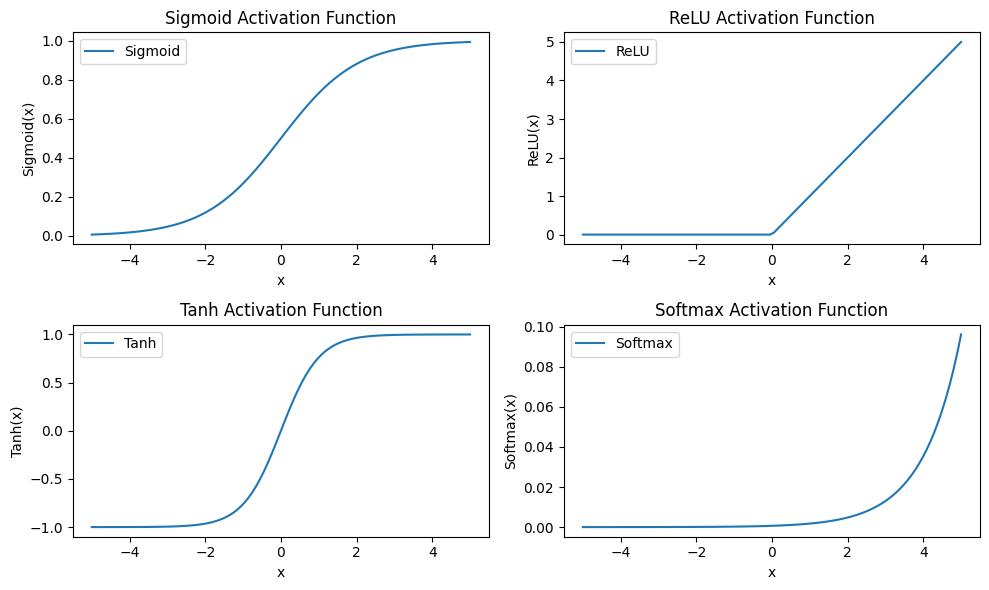

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def softmax(x):
    exp_vals = np.exp(x)
    return exp_vals / np.sum(exp_vals)

# Range of input values
x = np.linspace(-5, 5, 100)

# Compute activation function outputs
sigmoid_output = sigmoid(x)
relu_output = relu(x)
tanh_output = tanh(x)
softmax_output = softmax(x)

# Plotting the activation functions
plt.figure(figsize=(10, 6))

# Sigmoid
plt.subplot(2, 2, 1)
plt.plot(x, sigmoid_output, label='Sigmoid')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid Activation Function')
plt.legend()

# ReLU
plt.subplot(2, 2, 2)
plt.plot(x, relu_output, label='ReLU')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU Activation Function')
plt.legend()

# Tanh
plt.subplot(2, 2, 3)
plt.plot(x, tanh_output, label='Tanh')
plt.xlabel('x')
plt.ylabel('Tanh(x)')
plt.title('Tanh Activation Function')
plt.legend()

# Softmax
plt.subplot(2, 2, 4)
plt.plot(x, softmax_output, label='Softmax')
plt.xlabel('x')
plt.ylabel('Softmax(x)')
plt.title('Softmax Activation Function')
plt.legend()

plt.tight_layout()
plt.show()


## 2. Generate ANDNOT function using McCulloch-Pitts neural net by a python program.



Q: What is the McCulloch-Pitts neural net?
A: The McCulloch-Pitts neural net, also known as the M-P neuron model, is a simplified model of a biological neuron proposed by Warren McCulloch and Walter Pitts in 1943. It is one of the earliest neural network models and laid the foundation for future developments in the field of artificial neural networks.

Q: What is the purpose of the ANDNOT function?
A: The ANDNOT function is a logical operation that takes two binary inputs and produces an output based on the logical AND operation applied to the first input and the negation (NOT) of the second input. It returns '1' if the first input is '1' and the second input is '0', and '0' otherwise.

In [ ]:
def andnot(x1, x2):
    w1, w2, theta = -1, -1, -2
    y = x1*w1 + x2*w2
    if y <= theta:
        return 1
    else:
        return 0

print(andnot(0, 0)) # Output: 0
print(andnot(0, 1)) # Output: 1
print(andnot(1, 0)) # Output: 0
print(andnot(1, 1)) # Output: 0

0
0
0
1


## 3. Write a Python Program using Perceptron Neural Network to recognise even and odd numbers. Given numbers are in ASCII form 0 to 9

Q: What is a Perceptron Neural Network?

A: A Perceptron Neural Network is a type of artificial neural network that consists of a single layer of artificial neurons, also known as perceptrons. It is a fundamental building block of deep learning models and can be used for binary classification tasks.

Q: How does the Perceptron Neural Network work?

A: The Perceptron Neural Network takes a set of input features, applies weights to them, and sums them up. The sum is then passed through an activation function to produce an output. The weights are adjusted during the training process to minimize the error between the predicted output and the desired output.

Q: How can a Perceptron Neural Network be used to recognize even and odd numbers in ASCII form?

A: To recognize even and odd numbers in ASCII form using a Perceptron Neural Network, we can represent each ASCII number as a binary vector. The binary vector will have 10 elements, representing the digits 0 to 9. We can then train the Perceptron using labeled data, where the desired output for even numbers is 1 and for odd numbers is 0. The Perceptron will learn to classify the input binary vectors as even or odd based on the weights adjusted during training.

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, input_size):
        # Initialize random weights and bias
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def activate(self, inputs):
        # Calculate the weighted sum of inputs and apply activation function
        weighted_sum = np.dot(self.weights, inputs) + self.bias
        if weighted_sum >= 0:
            return 1
        else:
            return 0

    def train(self, X_train, y_train, epochs, learning_rate):
        # Training loop
        for _ in range(epochs):
            # Iterate through training data
            for inputs, target in zip(X_train, y_train):
                inputs = np.array(inputs)
                # Activate the perceptron and get prediction
                prediction = self.activate(inputs)
                # Calculate the error
                error = target - prediction

                # Update weights and bias based on the learning rate and error
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error

    def predict(self, X_test):
        predictions = []
        # Iterate through test data
        for inputs in X_test:
            inputs = np.array(inputs)
            # Activate the perceptron and get prediction
            prediction = self.activate(inputs)
            predictions.append(prediction)
        return predictions

# Training data: numbers 0 to 100 and their corresponding labels
X_train = [[i] for i in range(101)]
y_train = [0 if i % 2 == 1 else 1 for i in range(101)]

# Create Perceptron
input_size = len(X_train[0])
perceptron = Perceptron(input_size)

# Train the Perceptron
epochs = 1000
learning_rate = 0.01
perceptron.train(X_train, y_train, epochs, learning_rate)

# Test the Perceptron
X_test = [[48], [55], [57], [50], [53], [52]]
predictions = perceptron.predict(X_test)

# Print predictions
for number, prediction in zip(X_test, predictions):
    result = "Even" if prediction == 0 else "Odd"
    print(f"Number: {number[0]}, Prediction: {result}")


Number: 48, Prediction: Odd
Number: 55, Prediction: Odd
Number: 57, Prediction: Odd
Number: 50, Prediction: Odd
Number: 53, Prediction: Odd
Number: 52, Prediction: Odd


## 4. With a suitable example demonstrate the perceptron learning law with its decision regions using python. Give the output in graphical form

Q: What is the Perceptron learning law?

A: The Perceptron learning law, also known as the Perceptron algorithm, is a binary classification algorithm used in machine learning. It is based on a mathematical model of a neuron called a perceptron. The learning law specifies how the weights of the perceptron should be adjusted to correctly classify input patterns.

Q: How does the Perceptron learning law work?

A: The Perceptron learning law works by iteratively adjusting the weights of the perceptron based on the classification errors made on training examples. It follows the steps below:

1. Initialize the weights and bias term of the perceptron.

2. For each training example:
    a. Compute the output of the perceptron based on the current weights and inputs.

    b. Update the weights and bias term according to the learning law if a misclassification occurs.
      
3. Repeat steps 2 until all training examples are correctly classified or a maximum number of iterations is reached.

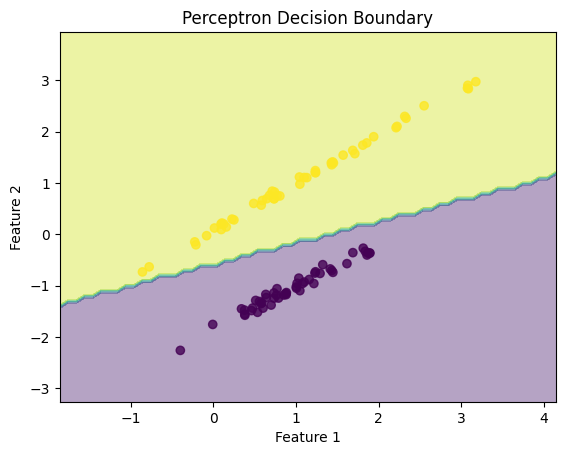

In [ ]:
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

class PerceptronPlotter:
    def __init__(self, random_seed=42):
        self.random_seed = random_seed
        self.X_train = None
        self.y_train = None
        self.clf = None

    def generate_data(self):
        np.random.seed(self.random_seed)
        self.X_train, self.y_train = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

    def train_classifier(self):
        self.clf = Perceptron().fit(self.X_train, self.y_train)

    def plot_decision_regions(self):
        xx, yy = np.meshgrid(np.arange(self.X_train[:, 0].min() - 1, self.X_train[:, 0].max() + 1, 0.02),
                             np.arange(self.X_train[:, 1].min() - 1, self.X_train[:, 1].max() + 1, 0.02))
        Z = self.clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
        plt.scatter(self.X_train[:, 0], self.X_train[:, 1], c=self.y_train, cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Perceptron Decision Regions')
        plt.show()

    def run(self):
        self.generate_data()
        self.train_classifier()
        self.plot_decision_regions()

plotter = PerceptronPlotter(random_seed=44)
plotter.run()


## 5. Write a python Program for Bidirectional Associative Memory with two pairs of vectors.


In [ ]:
import numpy as np

def bam(input_patterns,output_patterns):
    # Convert input and output patterns to numpy arrays
    input_patterns=np.array(input_patterns)
    output_patterns= np.array(output_patterns)
    
    # Create the weight matrix
    weight_matrix = np.dot(output_patterns.T,input_patterns)
    
    # Define the activation function
    def activation(input_pattern):
        output_pattern = np.dot(weight_matrix,input_pattern)
        output_pattern[output_pattern>=0]=1
        output_pattern[output_pattern<0]=-1
        return output_pattern
    
    # Test the BAM with the input patterns
    print("input patterns | output patterns")
    for i in range(input_patterns.shape[0]):
        input_pattern = input_patterns[i]
        output_pattern = activation(input_pattern)
        print(f"{input_pattern} | {output_pattern}")

# Define the input and output patterns
input_patterns=[[1,-1,1,-1],[1,1,-1,-1]]
output_patterns=[[1,1],[-1,-1]]

# Test the BAM with the input and output patterns
bam(input_patterns,output_patterns)


input patterns | output patterns
[ 1 -1  1 -1] | [1 1]
[ 1  1 -1 -1] | [-1 -1]


### 6. Write a python program to recognize the number 0, 1, 2, 39. A 5 * 3 matrix forms the numbers. For any valid point it is taken as 1 and invalid point it is taken as 0. The net has to be trained to recognize all the numbers and when the test data is given, the network has to recognize the particular numbers

In [ ]:
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

class PerceptronNN:
    def __init__(self, nn=10):
        self.nn = nn
        self.clf = MLPClassifier(hidden_layer_sizes=(self.nn,), random_state=42)
        self.train_data = {
            0: [[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]],
            1: [[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0]],
            2: [[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]],
            3: [[1, 1, 1], [0, 0, 1], [0, 1, 1], [0, 0, 1], [1, 1, 1]],
            4: [[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]],
            5: [[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]],
            6: [[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]],
            7: [[1, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 0], [1, 0, 0]],
            8: [[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]],
            9: [[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]]
        }

    def train(self):
        # Create the training set
        training_data = self.train_data
        X_train = []
        y_train = []
        for digit, data in training_data.items():
            X_train.append(np.array(data).flatten())
            y_train.append(digit)

        # Convert training data to NumPy arrays
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        # print(X_train, y_train)

        # Train the MLP classifier
        self.clf.fit(X_train, y_train)

    def recognize(self, test_data):
        # Convert test data to NumPy array
        X_test = np.array(test_data)
        predictions = self.clf.predict(X_test)
        majority_vote = np.argmax(np.bincount(predictions))
        return majority_vote

recognizer = PerceptronNN(16)
recognizer.train()
# test_data = [[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]
test_data = [[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]]
test_data = np.array([test_data]).flatten()
predictions = recognizer.recognize([test_data])
print(predictions)


6


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 7. Implement Artificial Neural Network training process in Python by using Forward Propagation, Back Propagation.

In [ ]:
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))
        
    def forward_propagation(self, X):
        # Forward propagation through the network
        
        # Layer 1 (input to hidden)
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        # Layer 2 (hidden to output)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def backward_propagation(self, X, y, learning_rate):
        # Backpropagation to update weights and biases
        
        # Calculate gradients
        self.dz2 = self.a2 - y
        self.dW2 = np.dot(self.a1.T, self.dz2)
        self.db2 = np.sum(self.dz2, axis=0, keepdims=True)
        self.dz1 = np.dot(self.dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        self.dW1 = np.dot(X.T, self.dz1)
        self.db1 = np.sum(self.dz1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1
    
    def train(self, X, y, epochs, learning_rate):
        # Training the neural network
        
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward_propagation(X)
            
            # Backpropagation
            self.backward_propagation(X, y, learning_rate)
            
            # Print loss for every 100 epochs
            if epoch % 100 == 0:
                loss = self.calculate_loss(y, output)
                print(f"Epoch {epoch}: Loss = {loss:.4f}")
    
    def predict(self, X):
        # Make predictions using the trained network
        
        output = self.forward_propagation(X)
        predictions = np.argmax(output, axis=1)
        return predictions
    
    def sigmoid(self, x):
        # Sigmoid activation function
        
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        # Derivative of the sigmoid function
        
        return x * (1 - x)
    
    def calculate_loss(self, y_true, y_pred):
        # Calculate the mean squared loss
        
        return np.mean(np.square(y_true - y_pred))

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)

# Define the training data (X) and target labels (y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train the neural network for 1000 epochs with a learning rate of 0.1
epochs = 1000
learning_rate = 0.1

for epoch in range(epochs):
    # Forward propagation
    output = nn.forward_propagation(X)

    # Backpropagation
    nn.backward_propagation(X, y, learning_rate)

    # Print loss for every 100 epochs
    if epoch % 100 == 0:
        loss = nn.calculate_loss(y, output)
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Make predictions on new data
new_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = nn.predict(new_data)

print(predictions)


Epoch 0: Loss = 0.3107
Epoch 100: Loss = 0.2395
Epoch 200: Loss = 0.2231
Epoch 300: Loss = 0.1957
Epoch 400: Loss = 0.1653
Epoch 500: Loss = 0.1322
Epoch 600: Loss = 0.0883
Epoch 700: Loss = 0.0501
Epoch 800: Loss = 0.0275
Epoch 900: Loss = 0.0155
[0 0 0 0]


## B1. Write a python program to show Back Propagation Network for XOR function with Binary Input and Output

In [ ]:
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

class BackpropagationXOR:
    def __init__(self):
        # Initialize weights and biases
        self.W1 = np.random.randn(2, 2)
        self.b1 = np.zeros((1, 2))
        self.W2 = np.random.randn(2, 1)
        self.b2 = np.zeros((1, 1))

    def forward_propagation(self, X):
        # Forward propagation through the network

        # Layer 1 (input to hidden)
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # Layer 2 (hidden to output)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def backward_propagation(self, X, y, learning_rate):
        # Backpropagation to update weights and biases

        # Calculate gradients
        self.dz2 = self.a2 - y
        self.dW2 = np.dot(self.a1.T, self.dz2)
        self.db2 = np.sum(self.dz2, axis=0, keepdims=True)
        self.dz1 = np.dot(self.dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        self.dW1 = np.dot(X.T, self.dz1)
        self.db1 = np.sum(self.dz1, axis=0, keepdims=True)

        # Update weights and biases
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1

    def train(self, X, y, epochs, learning_rate):
        # Training the neural network

        for epoch in range(epochs):
            # Forward propagation
            output = self.forward_propagation(X)

            # Backpropagation
            self.backward_propagation(X, y, learning_rate)

            # Print loss for every 100 epochs
            if epoch % 100 == 0:
                loss = self.calculate_loss(y, output)
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        # Make predictions using the trained network

        output = self.forward_propagation(X)
        predictions = np.round(output)
        return predictions

    def sigmoid(self, x):
        # Sigmoid activation function

        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivative of the sigmoid function

        return x * (1 - x)

    def calculate_loss(self, y_true, y_pred):
        # Calculate the mean squared loss

        return np.mean(np.square(y_true - y_pred))

xor_net = BackpropagationXOR()

# Define the training data (X) and target labels (y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train the neural network for 1000 epochs with a learning rate of 0.1
epochs = 1000
learning_rate = 0.1

for epoch in range(epochs):
    # Forward propagation
    output = xor_net.forward_propagation(X)

    # Backpropagation
    xor_net.backward_propagation(X, y, learning_rate)

    # Print loss for every 100 epochs
    if epoch % 100 == 0:
        loss = xor_net.calculate_loss(y, output)
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Make predictions on new data
new_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = xor_net.predict(new_data)

# Print the predictions
predictions


Epoch 0: Loss = 0.2520
Epoch 100: Loss = 0.2499
Epoch 200: Loss = 0.2498
Epoch 300: Loss = 0.2496
Epoch 400: Loss = 0.2492
Epoch 500: Loss = 0.2486
Epoch 600: Loss = 0.2470
Epoch 700: Loss = 0.2429
Epoch 800: Loss = 0.2327
Epoch 900: Loss = 0.2140


array([[0.],
       [0.],
       [1.],
       [0.]])

## Write a python program to illustrate ART neural network.

In [ ]:
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

class ARTNeuralNetwork:
    def __init__(self, num_features, max_categories=100, rho=0.5, beta=1.0):
        self.num_features = num_features
        self.max_categories = max_categories
        self.rho = rho
        self.beta = beta

        self.categories = np.ones((max_categories, num_features))

    def compute_similarity(self, pattern):
        return np.sum(self.categories * pattern, axis=1) / (self.beta + np.sum(self.categories, axis=1))

    def learn(self, patterns):
        for p in patterns:
            pattern = np.array(p)
            while True:
                similarity = self.compute_similarity(pattern)
                if np.max(similarity) < self.rho:
                    # If no category is similar enough, create a new one
                    self.categories = np.vstack((self.categories, pattern))
                    break
                else:
                    # Update the most similar category
                    winner = np.argmax(similarity)
                    self.categories[winner] = self.beta * self.categories[winner] + (1 - self.beta) * pattern
                    if np.sum(self.categories[winner]) / np.sum(pattern) >= self.rho:
                        break
                    else:
                        self.categories = np.delete(self.categories, (winner), axis=0)
        return self.categories

    def predict(self, patterns):
        predictions = []
        for p in patterns:
            pattern = np.array(p)
            similarity = self.compute_similarity(pattern)
            winner = np.argmax(similarity)
            predictions.append(winner)
        return predictions

        
# Define binary patterns
patterns = [
    [1, 0, 0, 1, 1],
    [1, 0, 0, 1, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
]

# Initialize ART1 network
art1 = ARTNeuralNetwork(num_features=5, max_categories=4, rho=0.6, beta=0.5)

# Learn patterns
categories = art1.learn(patterns)
print(f"Categories after learning: {categories}")

# Predict categories for patterns
predictions = art1.predict(patterns)
print(f"Predicted categories: {predictions}")


Categories after learning: [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0.]]
Predicted categories: [4, 5, 6, 7]


In [ ]:
!pip install LegacyNeuralNetworks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from LegacyNeuralNetworks.Fill import Writer
from LegacyNeuralNetworks import ARTNeuralNetwork

write = Writer('output.txt')
print(write.questions) 

['activation_function', 'mcculloh_pitt', 'ascii_perceptron', 'descision_region_perceptron', 'recognize_5x3_matrix', 'ann_forward_backward', 'xor_backprop', 'art_network', 'hopfield_network', 'cnn_object_detection', 'cnn_image_classification', 'cnn_tf_implementation', 'mnist_detection', 'bam']


In [ ]:
write.getCode('mnist_detection')

##############################################


## 4. Write a python program to design a Hopfield Network which stores 4 vectors

In [ ]:
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))

    def train(self, training_vectors):
        num_vectors = len(training_vectors)
        for vector in training_vectors:
            vector = np.array(vector)
            self.weights += np.outer(vector, vector)
        np.fill_diagonal(self.weights, 0)
        self.weights /= num_vectors

    def recall(self, vector, steps=1):
        for _ in range(steps):
            output = np.dot(self.weights, vector)
            vector = np.where(output > 0, 1, -1)
        return vector

# Define binary patterns
training_vectors = [
    [-1, -1, 1, -1, 1, -1, -1, 1],
    [-1, -1, -1, -1, -1, 1, -1, -1],
    [-1, 1, 1, -1, -1, 1, -1, 1],
    [1, 1, -1, 1, -1, 1, 1, -1]
]

# Initialize Hopfield network
hopfield = HopfieldNetwork(num_neurons=8)

# Train network
hopfield.train(training_vectors)

# Try to recall a noisy version of the first training vector
noisy_vector = [-1, -1, 1, -1, 1, 1, -1, 1]  # Flip two bits of the first training vector
recalled_vector = hopfield.recall(noisy_vector, steps=5)

print(f"Noisy input:    {noisy_vector}")
print(f"Recalled output: {recalled_vector.tolist()}")


Noisy input:    [-1, -1, 1, -1, 1, 1, -1, 1]
Recalled output: [-1, -1, 1, -1, 1, -1, -1, 1]


## 5. Write Python program to implement CNN object detection. Discuss numerous performance evaluation metrics for evaluating the object detecting algorithms' performance

In [ ]:
 
import tensorflow as tf
model = tf.keras.applications.MobileNetV2(weights='imagenet')
# Load image and preprocess it
image = tf.keras.preprocessing.image.load_img('/content/WhatsApp Image 2023-04-30 at 21.58.27.jpg', target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
image = tf.expand_dims(image, axis=0)
# Run object detection
predictions = model.predict(image)
decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions)
# Print top predicted objects
for _, label, confidence in decoded_predictions[0]:
    print(f"{label}: {confidence * 100}%")


35363/35363 [==============================] - 0s 0us/step
breastplate: 5.840199068188667%
jigsaw_puzzle: 1.8242625519633293%
swing: 1.6637170687317848%
ambulance: 1.6612781211733818%
golfcart: 1.6555946320295334%


In [ ]:
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class CNNObjectDetection:
    def __init__(self, num_classes=10, filters=32, kernel=(3, 3), dense_nodes=64):
        self.filters = filters
        self.kernel = kernel
        self.dense_nodes = dense_nodes
        self.num_classes = num_classes
        self.model = self.create_model()

    def create_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(self.filters, self.kernel, activation='relu', input_shape=(32, 32, 3)),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(self.dense_nodes, activation='relu'),
            tf.keras.layers.Dense(self.num_classes, activation='softmax')
        ])
        return model

    def train_model(self, X_train, y_train, X_val, y_val, epochs, batch_size):
        # Compile the model
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Train the model
        history = self.model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

        return history

    def plot_accuracy(self, history):
        # Plot accuracy graph
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

    def plot_loss(self, history):
        # Plot loss graph
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper right')
        plt.show()

    def evaluate_model(self, X_test, y_test):
        loss, accuracy = self.model.evaluate(X_test, y_test)
        print("Test Loss:", loss)
        print("Test Accuracy:", accuracy)

    def run(self, X_train, y_train, X_val, y_val, X_test, y_test, epochs=10, batch_size=32, plot=False):
        history = self.train_model(X_train, y_train, X_val, y_val, epochs, batch_size)

        if plot: self.plot_accuracy(history)
        if plot: self.plot_loss(history)

        self.evaluate_model(X_test, y_test)

# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2, random_state=42)

# Normalize pixel values
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Create and train the model
cnn = CNNObjectDetection(num_classes=10, filters=32, kernel=(3, 3), dense_nodes=64)
cnn.run(X_train, y_train, 
        X_val, y_val, 
        X_test, y_test, 
        epochs=20, batch_size=128,
        plot=True)


170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/20
313/313 [==============================] - 32s 101ms/step - loss: 1.6132 - accuracy: 0.4232 - val_loss: 1.3550 - val_accuracy: 0.5209
Epoch 2/20
313/313 [==============================] - 33s 104ms/step - loss: 1.2946 - accuracy: 0.5452 - val_loss: 1.2656 - val_accuracy: 0.5498
Epoch 3/20
313/313 [==============================] - 30s 96ms/step - loss: 1.1763 - accuracy: 0.5895 - val_loss: 1.2095 - val_accuracy: 0.5858
Epoch 4/20
313/313 [==============================] - 33s 104ms/step - loss: 1.1015 - accuracy: 0.6163 - val_loss: 1.1445 - val_accuracy: 0.6056
Epoch 5/20
313/313 [==============================] - 29s 94ms/step - loss: 1.0524 - accuracy: 0.6348 - val_loss: 1.1059 - val_accuracy: 0.6168
Epoch 6/20
169/313 [===============>..............] - ETA: 12s - loss: 1.0056 - accuracy: 0.6527

KeyboardInterrupt: ignored

In [ ]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

class CNNModel:
    def __init__(self, num_classes):
        self.num_classes = num_classes
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(self.num_classes, activation='softmax')
        ])
        return model

    def train(self, X_train, y_train, epochs=10, batch_size=128):
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

    def evaluate(self, X_test, y_test):
        loss, accuracy = self.model.evaluate(X_test, y_test)
        print("Test Loss:", loss)
        print("Test Accuracy:", accuracy)

    def predict(self, X):
        return self.model.predict(X)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

num_classes = 10
cnn_model = CNNModel(num_classes)
cnn_model.train(X_train, y_train, epochs=10, batch_size=32)
cnn_model.evaluate(X_test, y_test)
predictions = cnn_model.predict(X_test)


In [ ]:
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

class MNISTClassifier:
    def __init__(self):
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
        ])
        return model

    def train(self, X_train, y_train, epochs=10, batch_size=32):
        self.model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    
    def visualize_data(self, X_data, y_data, num_samples=5):
        fig, axes = plt.subplots(1, num_samples, figsize=(10, 4))

        for i in range(num_samples):
            axes[i].imshow(X_data[i], cmap='gray')
            axes[i].set_title(f"Label: {y_data[i]}")
            axes[i].axis('off')

        plt.show()

    def evaluate(self, X_test, y_test):
        loss, accuracy = self.model.evaluate(X_test, y_test)
        print("Test Loss:", loss)
        print("Test Accuracy:", accuracy)

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Create an instance of the MNISTClassifier
mnist_classifier = MNISTClassifier()

# Train the model
mnist_classifier.train(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
mnist_classifier.evaluate(X_test, y_test)

# To visualize the data
mnist_classifier.visualize_data( X_test, y_test, num_samples=5)
